# Predicting Heart Disease

Working on healthcare solutions are challenging as we reached a point where everyone is expecting to find a cure for all diseases. But in order to give the best service, **diagnoses** has to be done first.

This is what the project about. Predicting Heart Disease even before the patient starts to develop life threatening symptoms.

This project is going to work on a EDA for the data before choosing a suitable model and splitting the data then train, validate, test.

### 1- Importing the needed libraries and loading the file

In [201]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [202]:
df = pd.read_csv(
    'heart_disease_prediction.csv'
    )
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Exploring

In [203]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


As we can see we have **12 Columns** with **917 entries**
The dataset also has **3 types** of data
Float64, int64, and strings.

In [205]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


As we can see all the feature seem to have complete values.

The average for the age is 53.5 Years old.

The Cholesterol has a big gap between the 75% and the 100% so we will need to deal with this gap in order to have a more coherent range. RestingBP and Cholesterol has min of ZERO which doesn't make much sense.

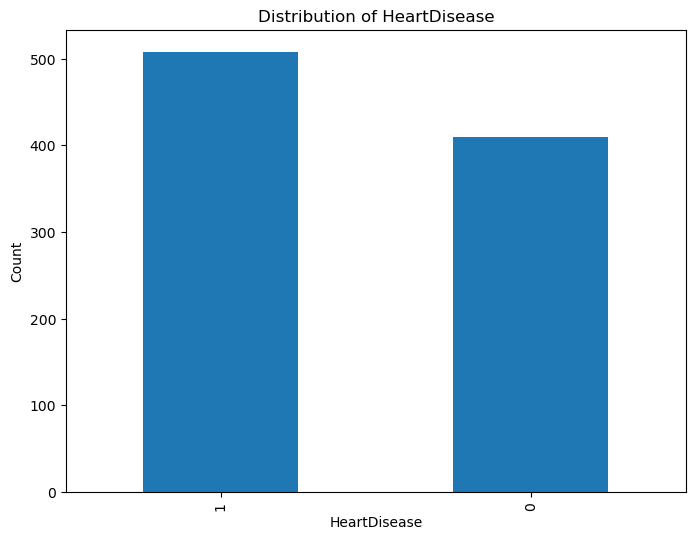

In [206]:
import matplotlib.pyplot as plt

# We start by showing the Hear Disease (target) column distribution in our data

df['HeartDisease'].value_counts().plot(kind='bar', figsize=(8,6))
plt.title('Distribution of HeartDisease')
plt.xlabel('HeartDisease')
plt.ylabel('Count')
plt.show()

As we can see in the targeted feature **Heart Disease** there is only 10% difference between the two conditions which means the minority isn't that small and we can work with it without oversampling or under sampling

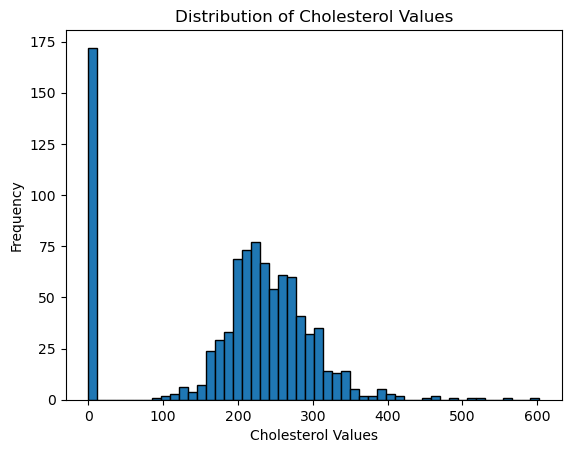

In [207]:
# Next we check the distribution of Cholesterol valuse in our dataset

plt.hist(df['Cholesterol'], bins=50, edgecolor='black')
plt.title('Distribution of Cholesterol Values')
plt.xlabel('Cholesterol Values')
plt.ylabel('Frequency')
plt.show()

As we can see in here there are more than 170 readings for Cholesterol that are ZERO. As this can't be right (none has a cholesterol level of ZERO). I will now look at this data Vs our target column \"HeartDisease\"

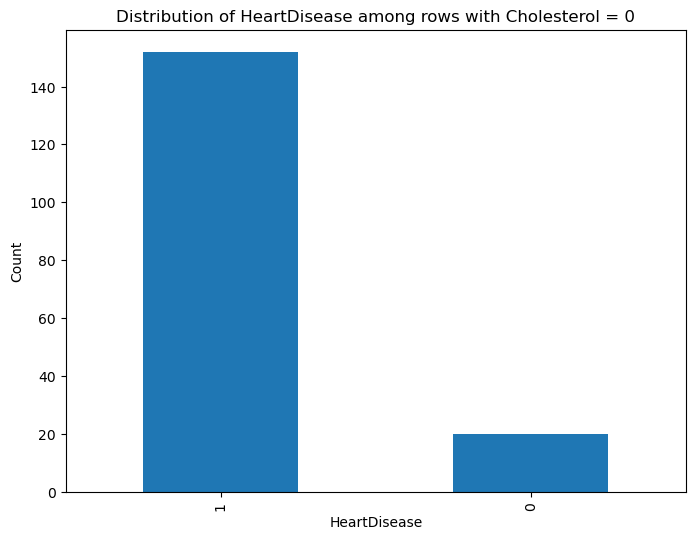

In [208]:
# We look at the distribution of ZERO Cholesterol values cross referenced with the target column

zero_cholesterol_hd = df[df['Cholesterol'] == 0]['HeartDisease'].value_counts()
zero_cholesterol_hd.plot(kind='bar', figsize=(8,6))
plt.title('Distribution of HeartDisease among rows with Cholesterol = 0')
plt.xlabel('HeartDisease')
plt.ylabel('Count')
plt.show()

More than 145 entries are with heart disease this mean these values need to be replaced or removed in order to be able to use this column.

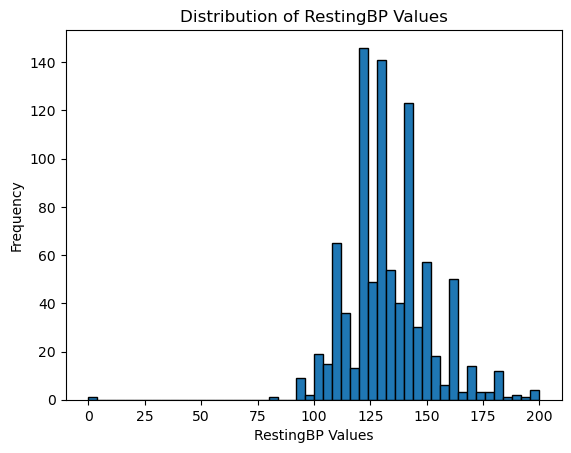

In [209]:
# We move to another column where we look at the RestingBP value distribution
plt.hist(df['RestingBP'], bins=50, edgecolor='black')
plt.title('Distribution of RestingBP Values')
plt.xlabel('RestingBP Values')
plt.ylabel('Frequency')
plt.show()

RestingBP has less than 5 with 0 values. This can be replaced or ingonred

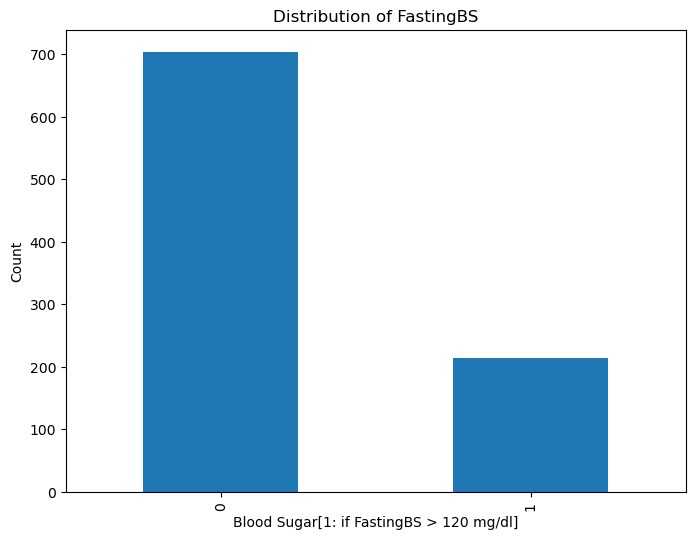

In [210]:
# Fasting Blood Sugar

df['FastingBS'].value_counts().plot(kind='bar', figsize=(8,6))
plt.title('Distribution of FastingBS')
plt.xlabel('Blood Sugar[1: if FastingBS > 120 mg/dl]')
plt.ylabel('Count')
plt.show()

For **Fasting Blood Sugar** can be tricky as there is no clear indication on what is higher than 120mg/di. It can be 121 mg/di or it can be 450 mg/di. So we have to be aware of this.

So maybe we can drop it as well. Expert's opnion would be the deciding factor in here.

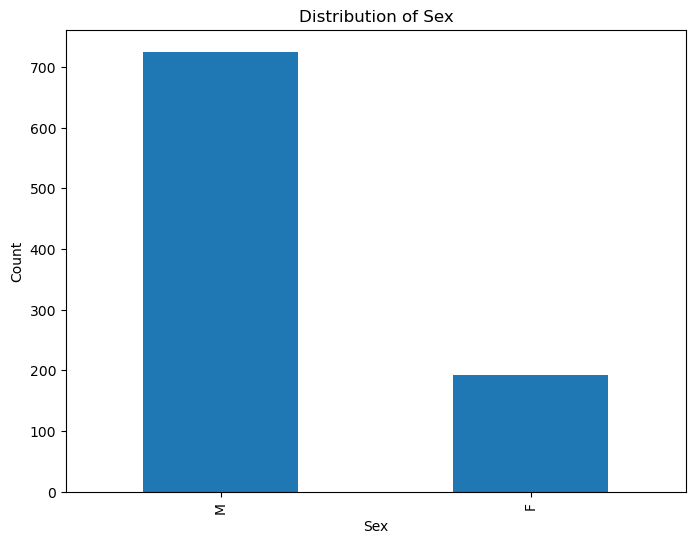

In [211]:
# Males Vs Female

df['Sex'].value_counts().plot(kind='bar', figsize=(8,6))
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

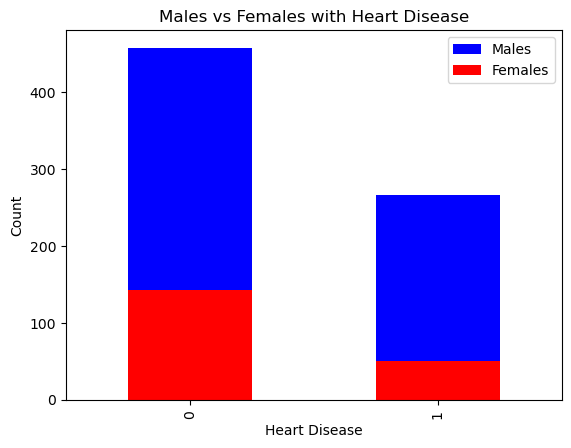

In [212]:
# Filtering the values between Males and Females

df[df['Sex'] == 'M']['HeartDisease'].value_counts().plot(kind='bar', color='blue', label='Males')
df[df['Sex'] == 'F']['HeartDisease'].value_counts().plot(kind='bar', color='red', label='Females')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Males vs Females with Heart Disease')
plt.legend()
plt.show()

The gap between Male and Female is big. This can lead to Bias in the data. An expert's opnion can help here if we can ignore this column all together.

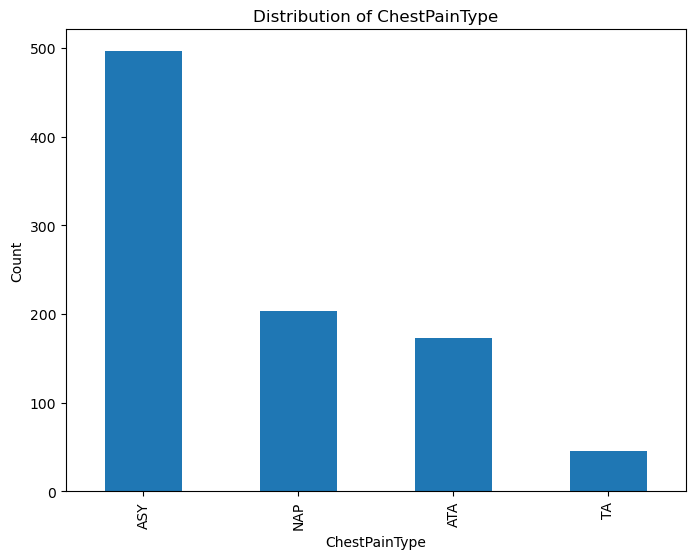

In [213]:
# Chest Pain Type through out our dataset

df['ChestPainType'].value_counts().plot(kind='bar', figsize=(8,6))
plt.title('Distribution of ChestPainType')
plt.xlabel('ChestPainType')
plt.ylabel('Count')
plt.show()

More than half of the Pain type is Typical Angina.

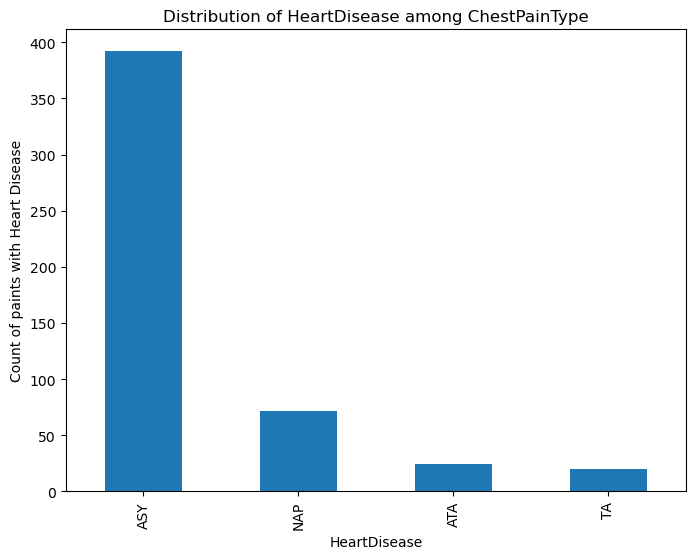

In [214]:
# Showing the Chest Pain Type for people with heart disease

df[df['HeartDisease'] == 1]['ChestPainType'].value_counts().plot(kind='bar', figsize=(8,6))
plt.title('Distribution of HeartDisease among ChestPainType')
plt.xlabel('HeartDisease')
plt.ylabel('Count of paints with Heart Disease')
plt.show()

Seems like ASY is by far the most coomon Pain Type among people with Heart Disease

In [215]:
df[df['HeartDisease'] == 1]['ChestPainType'].value_counts()

ASY    392
NAP     72
ATA     24
TA      20
Name: ChestPainType, dtype: int64

We see here that the most category with highest count of Heart Disease is ASY.

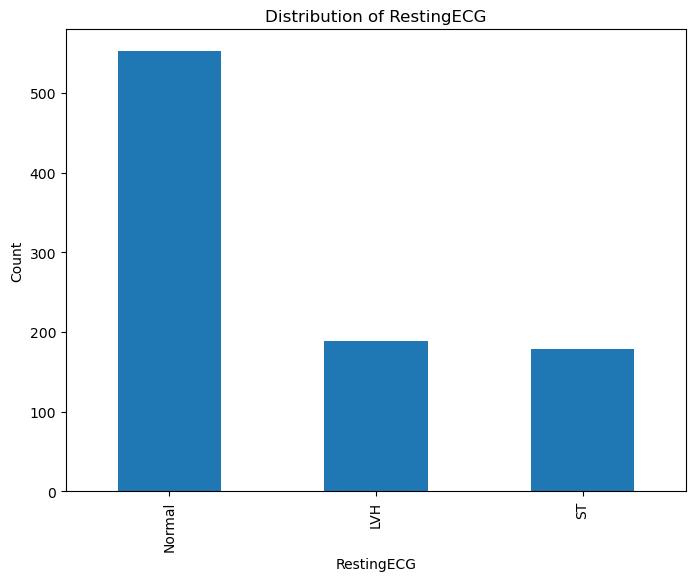

In [216]:
# Showing the Resting ECG types

df['RestingECG'].value_counts().plot(kind='bar', figsize=(8,6))
plt.title('Distribution of RestingECG')
plt.xlabel('RestingECG')
plt.ylabel('Count')
plt.show()

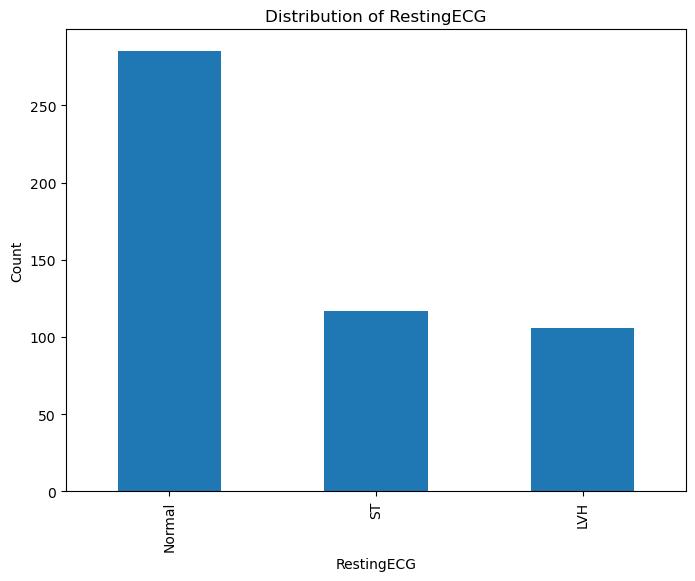

In [217]:
# Resting ECG types in sick people data

df[df['HeartDisease'] == 1]['RestingECG'].value_counts().plot(kind='bar', figsize=(8,6))
plt.title('Distribution of RestingECG')
plt.xlabel('RestingECG')
plt.ylabel('Count')
plt.show()

More than half of the RestingECG result is Normal. It doesn't seem there is much difference between the RestingECG results between all the data and sick people data.

### Before moving to data cleaning we can explore the data a bit more.

Let's see the percentage of patients who are males/females and over 50 and has Heart Disease.

Also the median age of patients who were diagnosed with Heart Disease both male and female

In [218]:
# Filtering the data by Sex, Heart Disease, and Age above 50

df_male_ill_over50 = df[
    (df['Sex'] =='M') & 
    (df['HeartDisease'] == 1) &
    (df['Age']>50)]

df_female_ill_over50 = df[
    (df['Sex'] =='F') & 
    (df['HeartDisease'] == 1) &
    (df['Age']>50)]

In [219]:
# Getting the percentage by dividing the number of people from our previous filter 
# by the total number of rows

prec_M_over50_ill = len(df_male_ill_over50)/len(df)*100
prec_F_over50_ill = len(df_female_ill_over50)/len(df)*100

print(f"Percentage of Male patients over 50: {prec_M_over50_ill:.2f}")
print(f"Percentage of Female patients over 50: {prec_F_over50_ill:.2f}")

Percentage of Male patients over 50: 37.47
Percentage of Female patients over 50: 4.25


In [220]:
# Percentage of sick Males vs Females within the data

df_male_ill = df[
    (df['Sex'] =='M') & 
    (df['HeartDisease'] == 1)]

df_female_ill = df[
    (df['Sex'] =='F') & 
    (df['HeartDisease'] == 1)]

prec_M_ill = len(df_male_ill)/len(df)*100
prec_F_ill = len(df_female_ill)/len(df)*100

print(f"Percentage of Male sick patients: {prec_M_ill:.2f}")
print(f"Percentage of Female sick patients: {prec_F_ill:.2f}")

Percentage of Male sick patients: 49.89
Percentage of Female sick patients: 5.45


It is clear that the data is bias in this case so my insight is, The Sex feature needs to be dropped but an expert's opnion is very criucal at this point.

In [221]:
male_age_median_sick= df[
    (df['HeartDisease']==1) & 
    (df['Sex'] =='M')]

female_age_median_sick = df[
    (df['HeartDisease']==1) & 
    (df['Sex'] =='F')]

print(f"Median Age of Male patients: {male_age_median_sick['Age'].median()}")
print(f"Median Age of Female patients: {female_age_median_sick['Age'].median()}")

Median Age of Male patients: 57.0
Median Age of Female patients: 58.0


## Data Observation Conclusion

The data is already not that bad. There are some missing data but it doesn't show as such.

### Feature that need action:

- Cholostoral ZERO data
- Sex

For Cholostral ZERO data I suggest filtering out the ZEROs get the mean for the rest of the data and then replacing the ZEROs with a range around that new mean.

For Sex feature. I suggest dropping the feature all togther.

In [222]:
# Filtering out the NOT Zero Cholesterol

cholo_not_zero = df[df['Cholesterol'] != 0]

In [223]:
len(cholo_not_zero)

746

In [224]:
# Calculating the mean

print(df['Cholesterol'].mean())
print(cholo_not_zero['Cholesterol'].mean())

198.7995642701525
244.6353887399464


Here it is clear that the average for the whole Cholesterol feature is 20% lower than the average for the Cholesterol feature after we exclude the ZERO values.

Now we are going to reassign values to the ZEROs instead of dropping these rows.

In [225]:
import numpy as np

# Assigning values around the average which is 244 so 200 to 300

df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = np.random.randint(200, 301, size=len(df[df['Cholesterol'] == 0]))

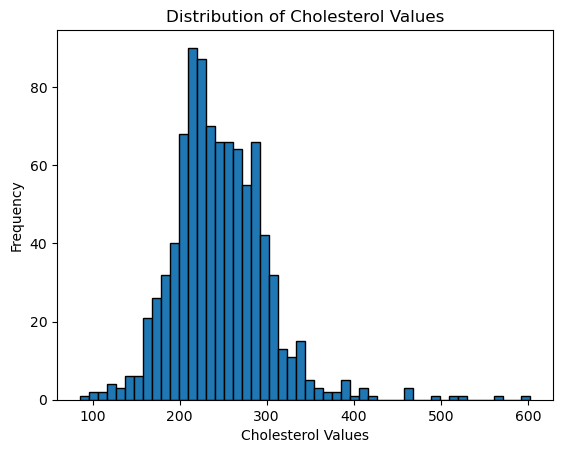

In [226]:
plt.hist(df['Cholesterol'], bins=50, edgecolor='black')
plt.title('Distribution of Cholesterol Values')
plt.xlabel('Cholesterol Values')
plt.ylabel('Frequency')
plt.show()

As we can see here this is the new distruption of the Cholesterol values.


Now to deal with the Sex column my suggestion is to drop it completely.

In [227]:
df = df.drop(columns =['Sex'])

In [228]:
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [229]:
# Calculating the Correlations to the Target Feature

correlations = df.corrwith(df['HeartDisease']).pow(2)
print(correlations)

Age             0.079546
RestingBP       0.011575
Cholesterol     0.012384
FastingBS       0.071445
MaxHR           0.160337
Oldpeak         0.163176
HeartDisease    1.000000
dtype: float64


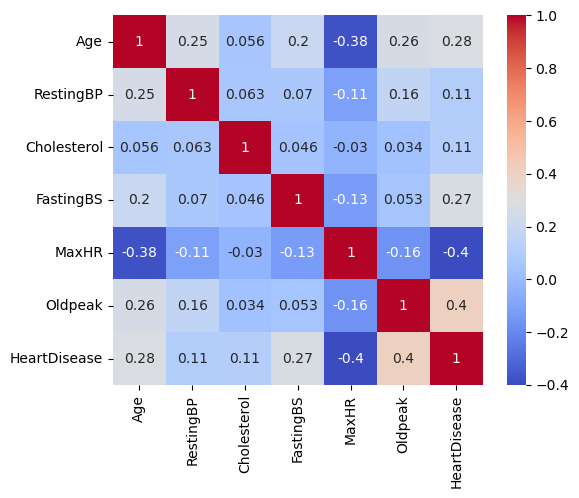

In [230]:
import seaborn as sns

# Creating a headmap

sns.heatmap(df.corr(), annot=True, cmap='coolwarm',square =True)
plt.show()

In [231]:
# Turning the catagorial features encoding

df = pd.get_dummies(df, drop_first=True)

In [232]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,0,1,0,1,0,0,0,1


In [233]:
correlations = df.corrwith(df['HeartDisease']).pow(2)
print(correlations)

Age                  0.079546
RestingBP            0.011575
Cholesterol          0.012384
FastingBS            0.071445
MaxHR                0.160337
Oldpeak              0.163176
HeartDisease         1.000000
ChestPainType_ATA    0.161543
ChestPainType_NAP    0.045354
ChestPainType_TA     0.003002
RestingECG_Normal    0.008387
RestingECG_ST        0.010512
ExerciseAngina_Y     0.244315
ST_Slope_Flat        0.307064
ST_Slope_Up          0.387088
dtype: float64


Based on the square of the Pearson correlation coefficient we might choose different features.

I will run the model with all the features first then i will select the more relvant features and try again.

# Fitting

In [234]:
# Creating the train and valdation sets

x = df.drop(columns=['HeartDisease']).copy()
y = df['HeartDisease']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.30, random_state = 420)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=.2, random_state = 417)

I'm going to run the model with each feature first then put them all together.

In [235]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Assigning the model

knn = KNeighborsClassifier()

# Assigning the scaler

scaler = StandardScaler()

In [236]:
# Running the model on each feature alone then printing the accuracy

features = [feature for feature in df.columns if feature != 'HeartDiesease']
accuracy = {}

for feature in features:
    if feature in x_train:
        knn.fit(x_train[[feature]], y_train)
        y_pred = knn.predict(x_val[[feature]])
        accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy for {feature}: {accuracy*100:.3f}")

Accuracy for Age: 58.696
Accuracy for RestingBP: 49.638
Accuracy for Cholesterol: 53.623
Accuracy for FastingBS: 55.435
Accuracy for MaxHR: 57.609
Accuracy for Oldpeak: 73.188
Accuracy for HeartDisease: 73.188
Accuracy for ChestPainType_ATA: 68.116
Accuracy for ChestPainType_NAP: 62.319
Accuracy for ChestPainType_TA: 56.159
Accuracy for RestingECG_Normal: 44.565
Accuracy for RestingECG_ST: 55.435
Accuracy for ExerciseAngina_Y: 55.435
Accuracy for ST_Slope_Flat: 78.261
Accuracy for ST_Slope_Up: 80.797


In [237]:
# Making sure that X and Y are correct

x = df.drop(columns=['HeartDisease']).copy()
y = df['HeartDisease']

# Scaling the features

x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

### Tuning the hyper-parameters for the model

This step i'm going to create a matrix of different parameters, fit the model with each, then print the best result with the parameters that achieved this result.

In [238]:
# Pereparing the matrix as a dic.

grid_params = {"n_neighbors": range(1, 10),"metric": ["minkowski", "manhattan"]}

# Assgining the grid and the model.

knn_grid = GridSearchCV(knn, grid_params, scoring = 'accuracy')

In [239]:
knn_grid.fit(x_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': range(1, 10)},
             scoring='accuracy')

In [240]:
# Printing the Accuracy of the model

accuracy = knn_grid.best_estimator_.score(x_val_scaled, y_val)
print(f'Model Accuracy on valdation set : {accuracy*100:.2f}')

Model Accuracy on valdation set : 84.42


In [241]:
# Printing the best score achieved by the different parameters
# and these parameters as well in order to use it later

print("Best score: ", knn_grid.best_score_)
print("Best parameters: ", knn_grid.best_params_)

Best score:  0.8440700552065487
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 9}


## Evaluating the model

I will first use the model with the parameters on the test set.

Then use three evaluation methods.
 - Accuracy
 - Confusion matrix
 - ROC Curve

In [242]:
# Creating a new model with the parameters

knn_best = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 9)

# Fitting the model again

knn_best.fit(x_train_scaled, y_train)

# Scaling the test split.

X_test_scaled = scaler.transform(x_test)

# Calculating the accuracy on the test set.

test_accuracy = knn_best.score(X_test_scaled, y_test)

In [243]:
# Print the accuracy score for the current feature

print(f" Accuracy for the test set: {test_accuracy*100 :.2f}%")

 Accuracy for the test set: 85.27%


The Accuracy on the test set seems as expected 1% higher than on the valdation set.

Now we move to the confusion matrix.

 Number of samples in test set: 129


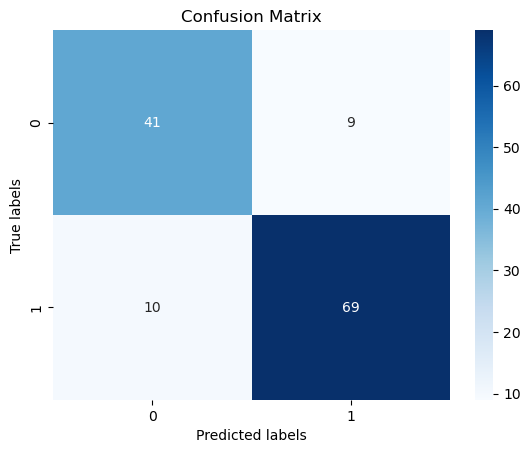

In [254]:
from sklearn.metrics import confusion_matrix

# Now we prepare the confusion matrix

y_pred = knn_best.predict(X_test_scaled)
conf_mat = confusion_matrix(y_test, y_pred)

print(f" Number of samples in test set: {len(y_test)}")

# Plotting the matrix

sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

As we can see from the Confusion matrix, we have:

- 41 True Negative
- 9 False Negative
- 69 True Postive
- 10 False Postive

In [255]:
from sklearn.metrics import roc_curve

# Preparing the y predict probabilty

y_pred_proba = knn_best.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

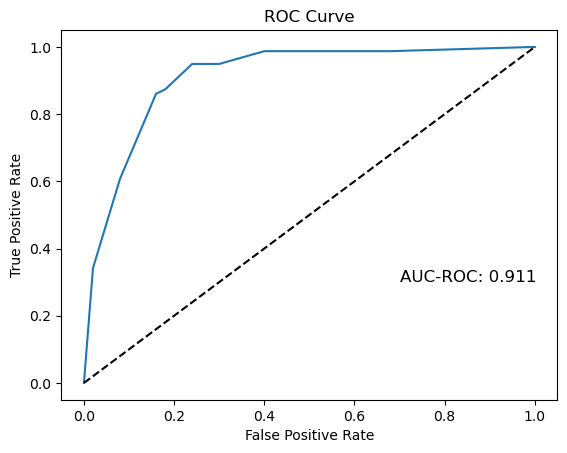

In [256]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc

# Plotting the ROC Curve

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  # plot the random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0.7, 0.3, f'AUC-ROC: {roc_auc:.3f}', fontsize=12)
plt.title('ROC Curve')
plt.show()

The ROC Curve is missing 0.09

## Conclusion

Over all i would say the model is doing well.

**Despite** that, using such a model to determine if people are sick or not has serious downfalls.

Accuracy of 85% is not enough to starting or ignore treatment. As ignoring these treatments can harm or maybe cause death and using them without being sick to begin with can cause serious side effects.

Accordingly such a model can be used as guidance but further tests are essential.

Treating doctors are the only ones eligible to take a decision in this case.